In [1]:
# PLEASE NOTE - THERE ARE TWO NOTEBOOKS IN LAB 3!

# This notebook is for working through some classifier comparison techniques 
# it corresponds to Lecture Handouts 3 and 4.
#
# The questions are:
#  -- Section 1: binary (two-class) classification (notebook: Lab 3 Ex. 1)  -- 
#   i) Evaluate & compare the ROC curves for different classifiers.
#  ii) Influence the classifier performance by introducing class weights.
#
#  -- Section 2: multi-class classification (notebook: Lab 3 Ex. 2) --
# iii) Evaluate & compare classifiers using the confusion matrix.
#  iv) Classifier selection with practical criteria.

In [2]:
# Autoload setup (you don't need to edit this cell); instructions to: 
#   i) enable autoreloading of modules
%load_ext autoreload
#  ii) import the module 'lab_3' (which will contain your functions) in an autoreloadable way 
%aimport lab_3
# iii) indicate that we want autoreloading to happen on every evaluation.
%autoreload 1

In [3]:
##############################################################
#
# Module import -- see Ex. 1 notebook.
#
##############################################################
import pandas as pd
import numpy as np
import sklearn as skl
import time
import itertools

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.7

import sklearn.linear_model as skl_lm

from sklearn.datasets import fetch_openml
from sklearn.utils import check_random_state

from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

import time



In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          show_values=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    ax = plt.figure(figsize=(10, 10)).add_subplot(111)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.02, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    if (show_values):
        fmt = '.2f' if normalize else 'd'
        thresh = 2*cm.max() / 3.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
# We are using off the shelf classifiers from the sklearn package
classifiers = {
    'Nearest Neighbors': KNeighborsClassifier(3),
    'Multinomial Logistic': LogisticRegression(C=50.0 / 5000,
                                multi_class='multinomial',
                                solver='newton-cg', tol=0.2),
    'Linear SVM' : SVC(kernel="linear", C=0.025, probability=True),
    'RBF SVM'    : SVC(C=5, gamma=0.05, probability=True),
    'Decision Tree' : DecisionTreeClassifier(max_depth=5)
}


In [7]:
#  
# Going Further: MultiClass Classification on the MNIST Dataset 
# using the Multinomial Logistic Regression
# 
# Loading the MNIST dataset
train_samples = 2000

df_X, df_y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = df_X.values / 255
y = df_y.values

#mnist = fetch_openml('mnist_784', version=1, cache=False)
#X = mnist.data.astype('float')/255
# X = StandardScaler().fit_transform(X)  # don't do this --- it makes every pixel equally significant!
#y = mnist.target
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

# splitting the dataset into training set and testing set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=500, random_state=0)

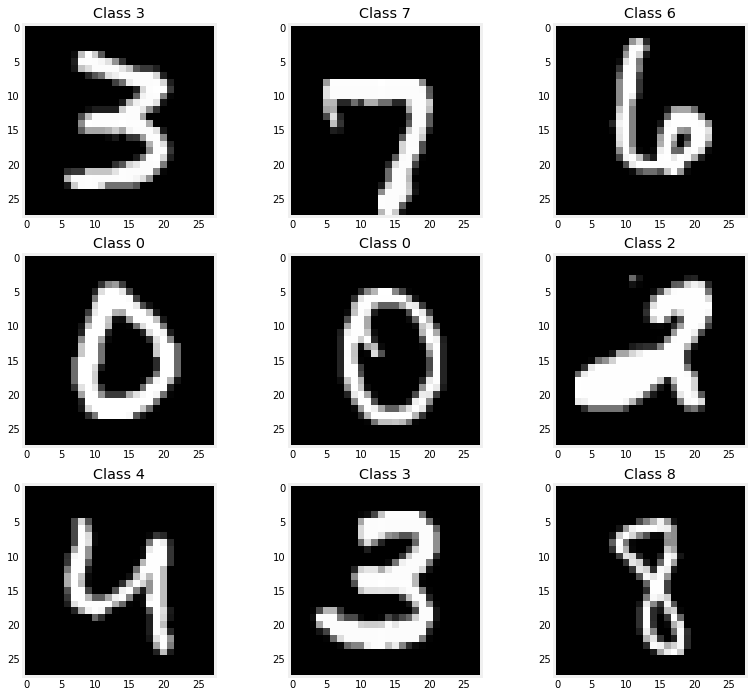

In [8]:
# showing some of the examples in the dataset

fig, ax = plt.subplots(3,3, figsize=(12,12))

for i in range(9):
    picture = np.reshape(X_train[i], (28, 28))

    plt.subplot(3,3,i+1)
    plt.imshow(picture, cmap='gray', interpolation='none')
    plt.gca().grid(False) 
    plt.title("Class {}".format(int(y_train[i])))

In [9]:
metrics = {}

for name, classifier in classifiers.items():    

    print('training for classifer: {}'.format(name))
    start_time = time.time()
    classifier.fit(X_train, y_train)
    end_time = time.time()
    
    m = {}
    m['training_time'] = end_time - start_time
    metrics[name] = m

print("done")

training for classifer: Nearest Neighbors
training for classifer: Multinomial Logistic
training for classifer: Linear SVM
training for classifer: RBF SVM
training for classifer: Decision Tree
done


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


for name, classifier in classifiers.items():  
    print('predictions for classifer: {}'.format(name))
    start_time = time.time()
    y_pred = classifier.predict(X_test)
    end_time = time.time()

    m = {}
    m['f1'] = f1_score(y_test, y_pred, average='macro')
    m['accuracy'] = accuracy_score(y_test, y_pred)
    m['precision'] = precision_score(y_test, y_pred, average='macro')
    m['recall'] = recall_score(y_test, y_pred, average='macro')
    m['prediction_time'] = end_time - start_time
    metrics[name].update(m)
print("done")


predictions for classifer: Nearest Neighbors
predictions for classifer: Multinomial Logistic
predictions for classifer: Linear SVM
predictions for classifer: RBF SVM
predictions for classifer: Decision Tree
done


In [11]:
df = pd.DataFrame(metrics).transpose()
display(df)


,accuracy,f1,precision,prediction_time,recall,training_time
Nearest Neighbors,0.906,0.905778,0.909433,0.138059,0.905393,0.012474
Multinomial Logistic,0.870,0.868831,0.871490,0.002110,0.868527,1.063025
Linear SVM,0.910,0.907692,0.907313,0.178621,0.909088,2.449061
RBF SVM,0.934,0.931961,0.934938,0.634178,0.932773,12.445626
Decision Tree,0.592,0.599665,0.632884,0.001325,0.598695,0.164920


In [12]:
# Question:
# What percentage of images in the test set are misclassified by the RBF SVM classifier?
#
# Provide your answer in the function 'question_3' in the lab module ('lab_3.py').


Normalized confusion matrix
[[ 0.923  0.000  0.051  0.000  0.000  0.000  0.026  0.000  0.000  0.000]
 [ 0.000  0.983  0.000  0.000  0.000  0.017  0.000  0.000  0.000  0.000]
 [ 0.000  0.000  0.974  0.000  0.026  0.000  0.000  0.000  0.000  0.000]
 [ 0.000  0.000  0.034  0.949  0.000  0.000  0.000  0.000  0.017  0.000]
 [ 0.018  0.018  0.018  0.000  0.891  0.000  0.000  0.000  0.000  0.055]
 [ 0.000  0.000  0.000  0.049  0.000  0.854  0.049  0.000  0.049  0.000]
 [ 0.000  0.000  0.042  0.000  0.000  0.000  0.958  0.000  0.000  0.000]
 [ 0.000  0.019  0.000  0.000  0.000  0.000  0.000  0.981  0.000  0.000]
 [ 0.000  0.000  0.037  0.000  0.000  0.000  0.000  0.000  0.944  0.019]
 [ 0.000  0.019  0.037  0.037  0.019  0.000  0.000  0.000  0.019  0.870]]


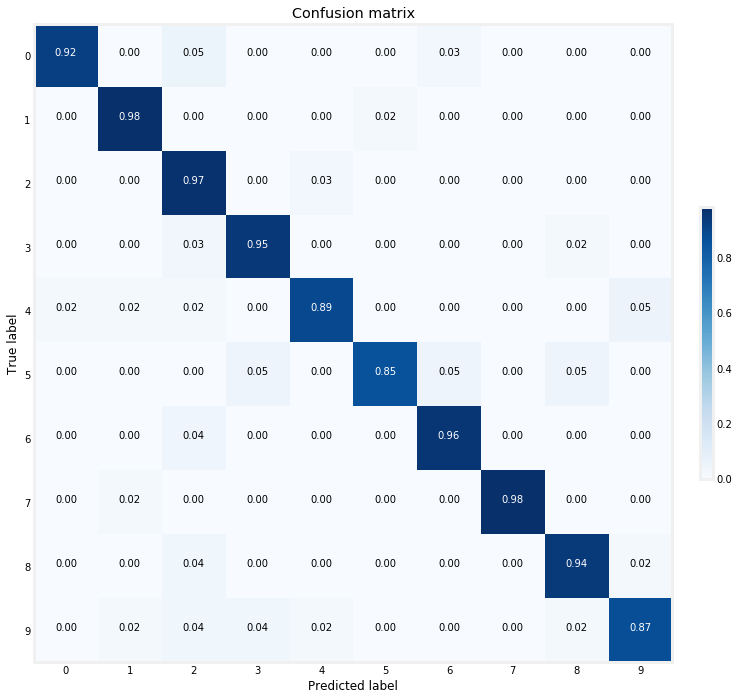

In [13]:
# Examine the performance of the RBF SVM classifier via the confusion matrix.

predicted_classes = classifiers['RBF SVM'].predict(X_test)

M = skl.metrics.confusion_matrix(y_test, predicted_classes)

class_names = [str(n) for n in range(0,10)]
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
plot_confusion_matrix(M, class_names, normalize=True, show_values=True)

In [ ]:
# Question:
# Which digit is most frequently misclassified?
#
# Provide your answer in the function 'question_4' in the lab module ('lab_3.py').